In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/COVID-19.csv')
data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0


In [4]:

data['Date'] = pd.to_datetime(data['Date'])

data['DateYearMonth'] = data['Date'].map(lambda date: 100*date.year + date.month)
data.head(80)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,202001
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,202001
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,202001
...,...,...,...,...,...,...,...,...,...,...,...
75,75,2020-01-22,Honduras,0,0,0.0,0.0,0,0,0,202001
76,76,2020-01-22,Hungary,0,0,0.0,0.0,0,0,0,202001
77,77,2020-01-22,Iceland,0,0,0.0,0.0,0,0,0,202001
78,78,2020-01-22,India,0,0,0.0,0.0,0,0,0,202001


In [5]:
april = data.query("DateYearMonth == 202004")

april

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
13510,13510,2020-04-01,Afghanistan,197,4,5.0,188.0,22,0,0,202004
13511,13511,2020-04-01,Albania,259,15,67.0,177.0,16,0,15,202004
13512,13512,2020-04-01,Algeria,847,58,61.0,728.0,131,14,15,202004
13513,13513,2020-04-01,Andorra,390,14,10.0,366.0,14,2,0,202004
13514,13514,2020-04-01,Angola,8,2,1.0,5.0,1,0,0,202004
...,...,...,...,...,...,...,...,...,...,...,...
19295,19295,2020-04-30,Vietnam,270,0,219.0,51.0,0,0,-3,202004
19296,19296,2020-04-30,West Bank and Gaza,344,2,76.0,266.0,0,0,5,202004
19297,19297,2020-04-30,Yemen,6,2,1.0,3.0,0,2,1,202004
19298,19298,2020-04-30,Zambia,106,3,55.0,48.0,9,0,1,202004


In [6]:
new_case_total = april.groupby(['Country/Region'])['New cases'].sum().reset_index()

new_case_total.tail(50)

,Country/Region,New cases
143,Rwanda,168
144,Saint Kitts and Nevis,7
145,Saint Lucia,4
146,Saint Vincent and the Grenadines,15
147,Samoa,0
148,San Marino,333
149,Sao Tome and Principe,14
150,Saudi Arabia,21190
151,Senegal,758
152,Serbia,8109


In [7]:
total = new_case_total.sort_values(by=['New cases','Country/Region'])

total.tail(8)

,Country/Region,New cases
65,Germany,91201
84,Italy,99671
142,Russia,104161
178,Turkey,106673
162,Spain,127546
183,United Kingdom,139956
61,France,140313
179,US,888804


In [8]:
data = data.rename(columns={data.columns[2]: 'CountryRegion'})

data

,Unnamed: 0,Date,CountryRegion,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,202001
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,202001
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,202001
...,...,...,...,...,...,...,...,...,...,...,...
108654,108654,2021-08-06,Vietnam,193381,3016,0.0,190365.0,4315,296,0,202108
108655,108655,2021-08-06,West Bank and Gaza,317703,3611,0.0,314092.0,169,2,0,202108
108656,108656,2021-08-06,Yemen,7131,1384,0.0,5747.0,27,1,0,202108
108657,108657,2021-08-06,Zambia,199135,3459,0.0,195676.0,680,12,0,202108


c:\users\frsco\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


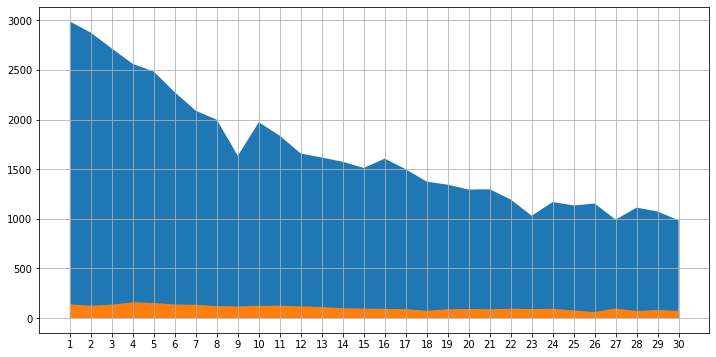

In [9]:
iran_info = data.query("DateYearMonth == 202004 and CountryRegion == 'Iran'")

iran_info['Date'] = iran_info['Date'].map(lambda date: date.day)

plt.figure(figsize=(12,6))
plt.grid()
plt.fill_between(iran_info['Date'].to_numpy(dtype=str),iran_info['New cases'],label='Cases')
plt.fill_between(iran_info['Date'].to_numpy(dtype=str),iran_info['New deaths'])

Text(0.5, 0, 'Months')

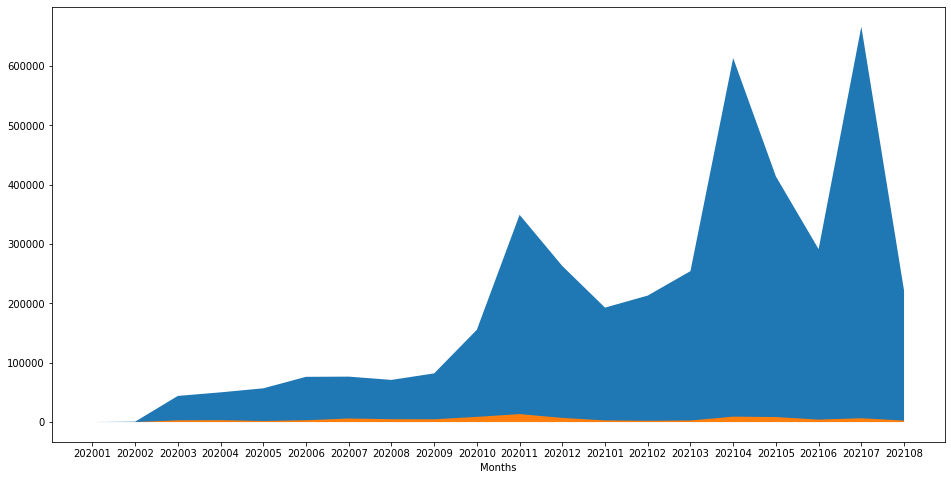

In [10]:
iran = data.query("CountryRegion == 'Iran'")

new_case_total = iran.groupby(['DateYearMonth'])['New cases'].sum().reset_index()
new_death_total = iran.groupby(['DateYearMonth'])['New deaths'].sum().reset_index()


new_case_total
plt.figure(figsize=(16,8))
x1 = new_case_total['DateYearMonth'].to_numpy(dtype=str)
y1 = new_case_total['New cases']
plt.fill_between(x1,y1,label='Second Line')
plt.fill_between(new_death_total['DateYearMonth'].to_numpy(dtype=str),new_death_total['New deaths'],label='Deaths')
plt.xlabel('Months')

